In [ ]:
from vllm import AsyncEngineArgs, AsyncLLMEngine
from qdrant_client import QdrantClient
from dotenv import load_dotenv
import os

base_llm = os.getenv("MODEL_PATH")

engine_args = AsyncEngineArgs(
    model=base_llm,
    tensor_parallel_size=1, # GPU 개수
    gpu_memory_utilization=0.95,
    max_num_seqs = 100, # 동시에 받을 수 있는 요청 개수
    max_model_len=4096, # input + output 토큰 길이
    max_num_batched_tokens=8192) # 한 batch 당 토근 길이 

llm = AsyncLLMEngine.from_engine_args(engine_args)

qdrant = QdrantClient(
    host=os.getenv("QDRANT_HOST"), 
    port=os.getenv("QDRANT_PORT"))

load_dotenv()

# 확인용
# os.environ["LANGSMITH_TRACING"]  
# print(os.getenv("QDRANT_HOST"))
# print(os.getenv("QDRANT_PORT"))

/home/yuri011228/ai2-server/deeplearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 05-14 00:34:36 [__init__.py:239] Automatically detected platform cuda.


2025-05-14 00:34:38,199	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 05-14 00:34:47 [config.py:689] This model supports multiple tasks: {'score', 'reward', 'classify', 'generate', 'embed'}. Defaulting to 'generate'.
INFO 05-14 00:34:47 [config.py:1901] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 05-14 00:34:49 [core.py:61] Initializing a V1 LLM engine (v0.8.4) with config: model='/home/yuri011228/ai2-server/models/mistral-7b', speculative_config=None, tokenizer='/home/yuri011228/ai2-server/models/mistral-7b', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(sho

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  33% Completed | 1/3 [00:01<00:02,  1.30s/it]
Loading safetensors checkpoint shards:  67% Completed | 2/3 [00:02<00:01,  1.40s/it]
Loading safetensors checkpoint shards: 100% Completed | 3/3 [00:04<00:00,  1.48s/it]
Loading safetensors checkpoint shards: 100% Completed | 3/3 [00:04<00:00,  1.45s/it]



INFO 05-14 00:34:55 [loader.py:458] Loading weights took 4.65 seconds
INFO 05-14 00:34:55 [gpu_model_runner.py:1291] Model loading took 13.4967 GiB and 4.848054 seconds
INFO 05-14 00:35:07 [backends.py:416] Using cache directory: /home/yuri011228/.cache/vllm/torch_compile_cache/8f3f217165/rank_0_0 for vLLM's torch.compile
INFO 05-14 00:35:07 [backends.py:426] Dynamo bytecode transform time: 11.19 s
INFO 05-14 00:35:08 [backends.py:115] Directly load the compiled graph for shape None from the cache
INFO 05-14 00:35:16 [monitor.py:33] torch.compile takes 11.19 s in total
INFO 05-14 00:35:19 [kv_cache_utils.py:634] GPU KV cache size: 49,296 tokens
INFO 05-14 00:35:19 [kv_cache_utils.py:637] Maximum concurrency for 4,096 tokens per request: 12.04x
INFO 05-14 00:35:54 [gpu_model_runner.py:1626] Graph capturing finished in 35 secs, took 0.51 GiB
INFO 05-14 00:35:54 [core.py:163] init engine (profile, create kv cache, warmup model) took 58.21 seconds
INFO 05-14 00:35:54 [core_client.py:435] C

True

In [3]:
dummy = {
  "email": "ConconDev",
  "date": "2024-09-06",
  "level": 1,
  "title": "알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리",
  "keywords": [
    "SSE",
    "SseEmitter",
    "알람 구독",
    "사용자별 관리"
  ],
  "til": "# 알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리\n\n## 1. 오늘 배운 내용\n\n오늘 저는 알람 구독 서비스를 개선하기 위해 `SseEmitter`를 활용하고, 각 사용자별로 `SseEmitter`를 저장하고 관리하는 기능을 구현했습니다.  `SseEmitter`는 서버에서 클라이언트로 실시간 데이터를 스트리밍하는 데 유용한 API입니다.\n\n## 2. 개념 정리\n\n*   **SSE (Server-Sent Events):** 서버에서 클라이언트로 단방향 통신을 가능하게 하는 웹 기술입니다. 서버가 새로운 이벤트 발생 시 클라이언트에게 자동으로 업데이트를 전송합니다.\n*   **SseEmitter:** SSE 통신을 위한 객체입니다.  데이터를 발행하거나, 연결을 종료하거나, 오류를 처리하는 등의 기능을 제공합니다.\n*   **ConcurrentHashMap:** 여러 스레드에서 동시에 접근해도 안전하게 데이터를 저장하고 검색할 수 있는 해시맵입니다.  여기서는 사용자 ID를 키로 하고 `SseEmitter`를 값으로 저장하는 데 사용되었습니다.\n\n## 3. 해당 개념이 필요한 이유\n\n기존 알람 구독 방식은 클라이언트가 주기적으로 서버에 요청을 보내는 방식으로, 서버 부하가 심하고 효율성이 떨어졌습니다. `SseEmitter`를 사용하면 서버는 새로운 알람이 발생했을 때만 클라이언트에 데이터를 전송하므로, 서버 자원을 절약하고 실시간성을 높일 수 있습니다. 또한, 사용자별로 `SseEmitter`를 관리함으로써, 특정 사용자에 대한 알람만 전송하도록 할 수 있어 더욱 효율적인 알람 구독 시스템을 구축할 수 있습니다.\n\n## 4. 개념을 활용하는 방법\n\n1.  `SseEmitter` 객체를 생성하고 초기화합니다.\n2.  사용자 ID를 키로, `SseEmitter` 객체를 값으로 `ConcurrentHashMap`에 저장합니다.\n3.  클라이언트에서 SSE 연결을 설정하고, 서버로부터 데이터를 수신합니다.\n4.  사용자가 알람 구독/취소 요청을 하면, 해당 사용자의 `SseEmitter`를 업데이트하거나 삭제합니다.\n\n## 5. 문제 해결 과정\n\n*   처음에는 `SseEmitter`의 생명주기를 제대로 관리하지 못하여 메모리 누수가 발생했습니다.  `SseEmitter` 객체의 `close()` 메서드를 호출하여 리소스 누수를 방지했습니다.\n*   사용자 ID 중복 문제를 해결하기 위해 사용자 ID를 키로 사용하는 `ConcurrentHashMap`을 사용했습니다.\n*   클라이언트에서 SSE 연결을 안정적으로 유지하기 위해 에러 핸들링 로직을 추가했습니다.\n\n## 6. 하루 회고\n\n오늘은 알람 구독 서비스의 성능 개선을 위해 중요한 기술인 `SseEmitter`를 익히고 적용하는 시간을 가졌습니다.  `SseEmitter`의 동작 원리를 이해하고, 실제 서비스에 적용하면서 많은 어려움을 겪었지만, 결국 성공적으로 구현할 수 있었습니다. 앞으로는 `SseEmitter`를 더 깊이 이해하고, 다양한 응용 분야에 적용해보고 싶습니다.\n\n## 7. 전체적으로 개조식 문장 구성\n\n*   **목표:** 알람 구독 서비스의 실시간성 및 효율성 향상\n*   **핵심 기술:** SSE, SseEmitter, ConcurrentHashMap\n*   **구현 단계:**\n    *   `SseEmitter` 객체 생성 및 초기화\n    *   사용자별 `SseEmitter` 저장 및 관리 (`ConcurrentHashMap`) \n    *   SSE 연결 설정 및 데이터 수신\n    *   알람 구독/취소 요청 처리\n    *   메모리 누수 방지 및 에러 핸들링\n\n"
}

prompt1 = """
You are a technical interviewer AI.

Your task is to generate exactly one interview question written in Korean, based on the following inputs:

- Level: {level}
- User TIL: {til}
- Reference documents: {retrieved}

## Output Instructions (strict):
- Your response must be a **single complete sentence** in **Korean**.
- The sentence must be a **clear interview-style question**, using natural question forms such as:
  “~입니까?”, “~있나요?”, “~설명해주세요”, “~어떻게 되나요?”, “~어떻게 생각하시나요?” etc.
- It must **not** be a declarative or answer-style sentence (e.g., ending with “~입니다”, “~합니다” ❌)

- ⚠️ Do NOT include any of the following:
  - English words or explanations
  - Headings, notes, or comments
  - Labels such as “Question:”, “Answer:”, “Note:”, or anything similar
  - Markdown symbols (e.g., **, ``, →, #, ##)
  - Emojis, quotation marks, parentheses, or line breaks

- Only write the Korean question sentence. Nothing else.

## Depth Control:
- Level 1: Ask about deep technical understanding and implementation logic
- Level 2: Ask about conceptual understanding
- Level 3: Ask about basic theoretical concepts

Respond with only one clean Korean question sentence. No explanations, no formatting, no extra text.

question:

"""

prompt2 = """
You are an AI assistant that answers a technical interview question based on the user's learning record.

Here is the input:
- Question: {question}
- User TIL: {til}
- Level: {level}
- Reference documents: {context}

Do not repeat the question.  
Generate **only one answer**, in **Korean**, based on the above information.  
Keep your answer **concise**, **clear**, and **free of unnecessary symbols** or decorations.

Just provide the answer in plain Korean. No introduction or explanation is needed.

answer:

"""

prompt3 = """
You are an AI assistant that summarizes a technical interview question and its answer into a short, meaningful Korean title.

Your goal is to create a clear and specific title that would fit well in a developer document or a technical spec.

Requirements:
- The title must be written in **Korean**
- The title must be **15 characters or fewer**
- Do NOT include any quotation marks, punctuation, or extra lines
- Write only the final title

Example:
Q: REST API란 무엇인가요?  
A: REST API는 HTTP 프로토콜을 기반으로 자원을 URI로 표현하고, CRUD를 HTTP 메서드로 수행하는 아키텍처입니다.  
title: REST API 개념 및 구성 요소

Now summarize the following Q&A in the same way.

{qacombined}

title:

"""

In [4]:
from pydantic import BaseModel
from typing import List, Optional, Dict, Any

class ContentState(BaseModel):
    question: str
    answer: str 

class QAState(BaseModel):
    email: str
    date: str
    level: int
    title: str
    keywords: List[str]
    til: str

    retrieved_texts: Optional[List[str]] = None
    similarity_score: Optional[float] = None

    question0: Optional[str] = None
    question1: Optional[str] = None
    question2: Optional[str] = None

    question: Optional[str] = None
    answer: Optional[str] = None

    content0: Optional[ContentState] = None
    content1: Optional[ContentState] = None
    content2: Optional[ContentState] = None

    #output
    content: Optional[List[ContentState]] = None
    summary: Optional[str] = None


qa_input = QAState(
    email=dummy['email'],
    date=dummy['date'],
    level=dummy['level'],
    title=dummy['title'],
    keywords=dummy['keywords'],
    til=dummy['til']
)


### 클래스

In [5]:
from langgraph.graph import StateGraph
from sentence_transformers import SentenceTransformer
from uuid import uuid4
from vllm import SamplingParams
import re

class QAFlow:
    def __init__(self, llm, qdrant, prompt1, prompt2, prompt3, max_nodes=3):
        self.llm = llm
        self.qdrant = qdrant
        self.prompt1 = prompt1
        self.prompt2 = prompt2
        self.prompt3 = prompt3
        self.max_nodes = max_nodes
        self.embedding_model = SentenceTransformer("BAAI/bge-m3", device="cpu")

    def embed_text(self, text: str) -> list[float]:
        return self.embedding_model.encode(text).tolist()

    async def retriever_node(self, state: QAState) -> dict:
        query = state.title + " " + " ".join(state.keywords)
        query_vector = self.embed_text(query)

        collection_names = ["ai", "cloud", "frontend", "backend"]
        best_score = 0.0
        retrieved_texts = []

        for col in collection_names:
            results = self.qdrant.search(
                collection_name=col,
                query_vector=query_vector,
                limit=3,
                with_payload=True
            )
            if results and results[0].score > best_score:
                best_score = results[0].score
                retrieved_texts = [r.payload["text"] for r in results if "text" in r.payload]

        return {
            "similarity_score": best_score,
            "retrieved_texts": retrieved_texts
        }
    
    # 후처리 추가 
    def clean_korean_question(self, text: str) -> str:

        text = re.sub(r'\*\*(.*?)\*\*', r'\1', text)

        # 라벨 및 마크다운 제거
        text = re.sub(r'\*\*?(Question|Answer|Note|Level).*?\*\*?', '', text, flags=re.IGNORECASE)
        text = re.sub(r'(Question|Answer|Level)\s*[:：]*', '', text, flags=re.IGNORECASE)
        text = re.sub(r'^#+\s*', '', text)

        # 문장 맨 앞 하이픈/번호 제거
        text = re.sub(r'^[-•\s]+\d*\s*', '', text)

        # 괄호 level (띄어쓰기 포함) 제거
        text = re.sub(r'\(\s*\d+\s*\)', '', text)

        # 기타 특수문자 제거
        text = text.replace("`", "").replace("“", "").replace("”", "")
        text = text.replace("👉", "").replace("→", "").strip()
        text = text.strip().strip('"“”')

        # 줄 단위로 나누기
        lines = [line.strip() for line in text.split('\n') if line.strip()]

        question_endings = ["?", "요.", "습니까", "설명해주세요", "어떻게", "무엇", 
                            "설명하시오", "구현하시오", "알려주세요", "어떤가요", "왜 그런가요"]
        
        # 완결된 질문형 문장만 탐색
        for line in lines:
            if any(ending in line for ending in question_endings):
                return line

        return lines[0] if lines else ""


    def generate_question_node(self, node_id: int):
        async def question_node(state: QAState) -> dict:
            retrieved = "\n\n".join(state.retrieved_texts or [])
            
            prompt1 = self.prompt1.format(
                til=state.til,
                level=state.level,
                retrieved=retrieved
            )

            sampling_params = SamplingParams(
                temperature=0.7,
                max_tokens=128,
                stop_token_ids=[2]
            )

            request_id = str(uuid4())
            final_text = ""

            async for output in self.llm.generate(
                prompt=prompt1,
                sampling_params=sampling_params,
                request_id=request_id
            ):
                final_text = output.outputs[0].text.strip()

            cleaned_question = self.clean_korean_question(final_text)

            # print(node_id, final_text)
            # print(node_id, cleaned_question)

            return {f"question{node_id}": cleaned_question}

        return question_node

    def generate_answer_node(self, node_id: int):
        async def answer_node(state: QAState) -> dict:
            question = getattr(state, f"question{node_id}", None)
            if not question:
                raise ValueError(f"질문 {node_id}가 없습니다.")

            context = "\n\n".join(state.retrieved_texts or [])

            prompt2 = self.prompt2.format(
                question=question,
                til=state.til,
                level=state.level,
                context=context
            )

            sampling_params = SamplingParams(
                temperature=0.7,
                max_tokens=256,
                stop_token_ids=[2]
            )

            request_id = str(uuid4())
            final_text = ""

            async for output in self.llm.generate(
                prompt=prompt2,
                sampling_params=sampling_params,
                request_id=request_id
            ):
                final_text = output.outputs[0].text.strip()

            return {
                #"content": [ContentState(question=question, answer=final_text)]
                f"content{node_id}": ContentState(
                    question=question,
                    answer=final_text)
            }

        return answer_node

    async def summary_node(self, state: QAState) -> dict:
        merged = []
        for i in range(3):
            item = getattr(state, f"content{i}", None)
            if item:
                merged.append(item)

        qacombined = "\n".join(
            f"Q: {item.question}\nA: {item.answer}" for item in merged
        )

        prompt3 = self.prompt3.format(
            qacombined = qacombined
        )

        sampling_params = SamplingParams(
            temperature=0.3,
            max_tokens=32,
            stop_token_ids=[2]
        )

        request_id = str(uuid4())
        final_text = ""

        async for output in self.llm.generate(
            prompt=prompt3,
            sampling_params=sampling_params,
            request_id=request_id
        ):
            final_text = output.outputs[0].text.strip()

        return {
            "summary": final_text,
            "content": merged
        }

    def build_graph(self):
        workflow = StateGraph(QAState)
        workflow.set_entry_point("retriever")
        workflow.add_node("retriever", self.retriever_node)

        for i in range(self.max_nodes):
            workflow.add_node(f"que{i}", self.generate_question_node(i))
            workflow.add_node(f"ans{i}", self.generate_answer_node(i))

            workflow.add_edge("retriever", f"que{i}")
            workflow.add_edge(f"que{i}", f"ans{i}")
            workflow.add_edge(f"ans{i}", "summary_generate")

        workflow.add_node("summary_generate", self.summary_node)
        workflow.set_finish_point("summary_generate")

        return workflow.compile()


In [6]:
qa_flow = QAFlow(llm=llm, qdrant=qdrant, prompt1=prompt1, prompt2=prompt2, prompt3=prompt3, max_nodes=3)
graph = qa_flow.build_graph()
result = await graph.ainvoke(qa_input)

# 결과 출력
print(result["summary"])

for c in result["content"]:
    print(c.question)
    print(c.answer)
    print()


INFO 05-14 00:36:36 [async_llm.py:228] Added request 1da07a71-2f2a-40c5-a209-a65cdbc79c1a.
INFO 05-14 00:36:36 [async_llm.py:228] Added request 8b6871dc-2652-4781-ab3d-8a7c8b961a11.
INFO 05-14 00:36:36 [async_llm.py:228] Added request dc997c6d-a70b-41ce-a233-2b744d6ff28f.


/tmp/ipykernel_13410/2998371373.py:29: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = self.qdrant.search(


INFO 05-14 00:36:43 [async_llm.py:228] Added request 20c84df0-f8dd-430d-be02-63f208e9807d.
INFO 05-14 00:36:43 [async_llm.py:228] Added request 47b8886c-186c-4dd4-af8d-5cf525aae9e0.
INFO 05-14 00:36:43 [async_llm.py:228] Added request 259541c8-e817-48fa-ba6a-3e18e360dca5.
INFO 05-14 00:37:01 [async_llm.py:228] Added request fa34bed2-9509-43b8-abe9-b805656afcca.
SSE 알람 서비스: 사용자별 SseEmitter 관리용 ConcurrentHashMap

title:

S
어떤 방식으로 SseEmitter 객체를 생성하고 사용자별 저장 및 관리하는 ConcurrentHashMap을 구성하여, 알람 구독 서비스를 개선하는데 도움이 되는지 설명해주세요?
SSE(서버 전송 이벤트)를 활용하여, 알람 구독 서비스를 개선하기 위해 사용자별 SseEmitter 객체를 생성하고 ConcurrentHashMap을 이용하여 관리하는 방법입니다. 이렇게 하면, 실시간 데이터 스트림을 지속적으로 전송하면서도 메모리 누수 문제를 해결하고, 특정 사용자에게만 알람을 전송하는 것이 가능해집니다. 웹브라우저는 최신 버전부터 모든 브라우저에서 SSE를 지원하고 있으며, 이를 활용하여 알람 구독 서비스의 실시간성과 효율성을 향상시킬 수 있습니다.

사용자별 SseEmitter를 관리하는 방법에 대해 자세히 설명해주세요.
SSE(Server-Sent Events)는 사용자가 HTTP 연결을 통해 서버로부터 자동 업데이트를 받는 서버 푸시 기술입니다. `SseEmitter`는 SSE를 구현하는 객체입니다. 각 사용자는 고유의 `SseEmitter`를 가지고 있어 실시간으로 데이터를 받을 수 있습니다. `Concurr

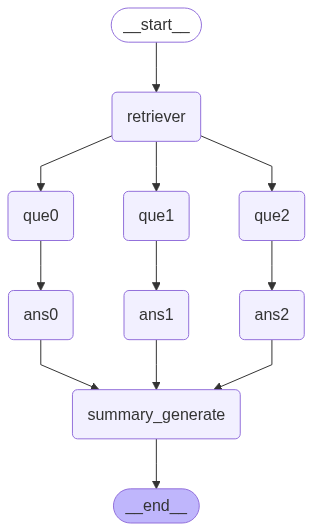

In [82]:
graph

In [9]:
qa_flow = QAFlow(llm=llm, qdrant=qdrant, prompt_template=prompt1, max_nodes=3)
graph = qa_flow.build_graph()

# 시각화 코드
print(graph.get_graph().draw_mermaid())


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	retriever(retriever)
	que0(que0)
	ans0(ans0)
	que1(que1)
	ans1(ans1)
	que2(que2)
	ans2(ans2)
	summary_generate(summary_generate)
	__end__([<p>__end__</p>]):::last
	__start__ --> retriever;
	ans0 --> summary_generate;
	ans1 --> summary_generate;
	ans2 --> summary_generate;
	que0 --> ans0;
	que1 --> ans1;
	que2 --> ans2;
	retriever --> que0;
	retriever --> que1;
	retriever --> que2;
	summary_generate --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



### 함수

In [4]:
from qdrant_client import QdrantClient
from sentence_transformers import SentenceTransformer
from vllm import SamplingParams
from uuid import uuid4

qdrant = QdrantClient(
    host=os.getenv("QDRANT_HOST"), 
    port=os.getenv("QDRANT_PORT"))

embedding_model = SentenceTransformer("BAAI/bge-m3", device="cpu")

def embed_text(text: str) -> list[float]:
    return embedding_model.encode(text).tolist()

async def retriever_node(state: QAState) -> dict:
    query = state.title + " " + " ".join(state.keywords)
    query_vector = embed_text(query)

    collection_names = ["ai", "cloud", "frontend", "backend"]
    best_score = 0.0

    for col in collection_names:
        results = qdrant.search(
            collection_name=col,
            query_vector=query_vector,
            limit=3,
            with_payload=True
        )

        if results and results[0].score > best_score:
            best_score = results[0].score
            retrieved_texts = [h.payload["text"] for h in results if "text" in h.payload]

    return {
        "similarity_score": best_score,
        "retrieved_texts": retrieved_texts
    }

result = await retriever_node(qa_input)
qa_input.retrieved_texts = result["retrieved_texts"]
qa_input.similarity_score = result["similarity_score"]
print(result)

async def question_node(state: QAState) -> dict:

    retrieved = "\n\n".join(state.retrieved_texts or [])

    prompt = prompt1.format(
        til=state.til,
        level=state.level,
        retrieved=retrieved
    )

    sampling_params = SamplingParams(
        temperature=0.7,
        max_tokens=1024,
        stop_token_ids=[2], 
    )

    request_id = str(uuid4())
    final_text = ""

    async for output in llm.generate(
        prompt=prompt,
        sampling_params=sampling_params,
        request_id=request_id
    ):
        final_text = output.outputs[0].text.strip()

    return {
        "question": final_text
    }

# q = await question_node(qa_input)
# qa_input.question = q["question"]
# print(q["question"])

async def answer_node(state: QAState) -> dict:
    if not state.question:
        raise ValueError("질문이 없습니다. 먼저 generate_node를 통해 질문을 생성해야 합니다.")

    context = "\n\n".join(state.retrieved_texts or [])
    
    prompt =f"""
    당신은 사용자의 기술 학습 기록을 바탕으로, 하나의 기술 면접 답변을 생성하는 AI입니다.

    아래 정보를 참고하여,
    질문: {state.question}
    사용자 TIL: {state.til}
    level: {state.level}
    - 참고 문서 {context}

    ※ level에 따라 질문 수준을 조절해서 질문에 대한 답변 ""1개""를 작성해주세요:
    - level "1": 깊은 기술 이해와 실무 경험 기반 질문
    - level "2": 개념적 이해를 묻는 질문
    - level "3": 기본 개념을 묻는 질문

    반드시 하나의 답변만 만들고 **한국어**로 작성해주세요.
    아래와 같은 형식으로 출력하되, 답변에 상관없는 기호나 문자는 빼주세요.
    답변: " "

    """

    sampling_params = SamplingParams(
        temperature=0.7,
        max_tokens=1024,
        stop_token_ids=[2],
    )

    request_id = str(uuid4())
    final_text = ""

    async for output in llm.generate(
        prompt=prompt,
        sampling_params=sampling_params,
        request_id=request_id
    ):
        final_text = output.outputs[0].text.strip()

    return {
        "answer": final_text,
        "content": [
            ContentState(
                question=state.question,
                answer=final_text
            )
        ]        
    }

# a = await answer_node(qa_input)
# qa_input.answer = a["answer"]
# qa_input.content = a["content"]

# print("🧾 질문:", qa_input.content[0].question)
# print("💬 답변:", qa_input.content[0].answer)

async def summary_node(state: QAState) -> dict:
    content_items = state.content or []

    combined = "\n".join(
        f"Q: {item.question}\nA: {item.answer}" for item in content_items
    )

    prompt = f"""
    다음은 면접 질문과 그에 대한 답변입니다. 질문과 답변의 내용을 보고 핵심 주제를 한 줄로 정리해주세요.  
    이 제목은 개발 문서나 기능 설명서에서 쓸 수 있을 정도로 간결하고 구체적이어야 합니다.

    예시:
    Q: REST API란 무엇인가요?  
    A: REST API는 HTTP 프로토콜을 기반으로 자원을 URI로 표현하고, CRUD를 HTTP 메서드로 수행하는 아키텍처입니다.  
    → 제목: REST API 개념 및 구성 요소

    다음 질문과 답변을 참고해서 위와 같은 형식으로 **15글자** 이내로 제목을 정리해주세요.

    {combined}

    → 제목:

    """

    sampling_params = SamplingParams(
        temperature=0.3,
        max_tokens=32,
        stop_token_ids=[2]
    )

    request_id = str(uuid4())
    final_text = ""

    async for output in llm.generate(
        prompt=prompt,
        sampling_params=sampling_params,
        request_id=request_id
    ):
        final_text = output.outputs[0].text.strip()

    return {
        "summary": final_text 
    }

{'similarity_score': 0.52782375, 'retrieved_texts': ['서버 전송 이벤트(Server-sent events, SSE)는 클라이언트가 HTTP 연결을 통해 서버로부터 자동 업데이트를 수신할 수 있도록 하는 서버 푸시 기술이며, 초기 클라이언트 연결이 설정된 후 서버가 클라이언트를 향한 데이터 전송을 시작하는 방법을 설명한다. 이는 일반적으로 브라우저 클라이언트에 메시지 업데이트 또는 지속적인 데이터 스트림을 보내는 데 사용되며 클라이언트가 이벤트 스트림을 수신하기 위해 특정 URL을 요청하는 EventSource라는 자바스크립트 API를 통해 기본 브라우저 간 스트리밍을 향상시키도록 설계되었다. EventSource API는 WHATWG에 의해 HTML Living Standard의 일부로 표준화되었다. SSE의 미디어 유형은 text/event-stream이다. 파이어폭스 6+, 구글 크롬 6+, 오페라 11.5+, 사파리 5+, 마이크로소프트 엣지 79+ 등 모든 최신 브라우저는 서버에서 전송되는 이벤트를 지원한다.', '푸시 기법 기술은 풀 기법으로 명명된 웹브라우저와 비교할 수 있다. 현재 인터넷에서 사용되고 있는 웹브라우저는 사용할 때에 사용자가 항상 자신이 갖고자 하는 정보를 소유한 서버에게 정보를 요청하며 웹브라우저의 사용과 목적지에 대한 최종결정 역시 사용자가 결정할 수 있다. 반면 푸시 기법은 사용자가 일일이 요청하지 않아도 사용자에게 자동으로 뉴스나 사용자가 원하는 특별한 정보, 예를 들면 증권시장의 주기적인 정보 같은 것을 제공한다. 이 두 가지 기법의 차이점은 정보의 흐름을 누가 통제하느냐 하는 점에 있다고 할 수 있다. 풀 기법 하에서는 사용자 (즉 소비자)들이 정보 취득 및 정보의 접촉을 마음대로 통제할 수 있으나, 푸시 기법 하에서는 정보를 전달하는 쪽에서(즉 광고주)정보의 흐름을 직접 통제할 수 있게 된다.', '푸시 기법의 가장 큰 이점은 역시 정보의 맞춤화(Customization)가 가능

/tmp/ipykernel_3820/2475243331.py:23: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = qdrant.search(


In [27]:
workflow = StateGraph(QAState)

# 시작 지점 설정
workflow.set_entry_point("retriever")

# 노드 선언
workflow.add_node("retriever",retriever_node)

workflow.add_node("question_generate",question_node)
workflow.add_node("answer_generate",answer_node)

workflow.add_node("summary_generate",summary_node)

workflow.add_edge("retriever", "question_generate")
workflow.add_edge("question_generate", "answer_generate")
workflow.add_edge("answer_generate", "summary_generate")

# 종료 지점 설정
workflow.set_finish_point("summary_generate")

graph = workflow.compile()

result = await graph.ainvoke(qa_input)

INFO 05-12 09:49:26 [async_llm.py:228] Added request 055832f9-c1b2-4b14-9a68-c35b26107530.


/tmp/ipykernel_2433/2708729159.py:24: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = qdrant.search(


INFO 05-12 09:49:40 [async_llm.py:228] Added request c2bd692e-1409-43c3-898f-b9081ba77187.
INFO 05-12 09:50:42 [async_llm.py:228] Added request d46e1a9a-c8dc-49e1-8d79-bce1fed8cbd3.


In [58]:
result

{'email': 'ConconDev',
 'date': '2024-09-06',
 'level': 1,
 'title': '알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리',
 'keywords': ['SSE', 'SseEmitter', '알람 구독', '사용자별 관리'],
 'til': '# 알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리\n\n## 1. 오늘 배운 내용\n\n오늘 저는 알람 구독 서비스를 개선하기 위해 `SseEmitter`를 활용하고, 각 사용자별로 `SseEmitter`를 저장하고 관리하는 기능을 구현했습니다.  `SseEmitter`는 서버에서 클라이언트로 실시간 데이터를 스트리밍하는 데 유용한 API입니다.\n\n## 2. 개념 정리\n\n*   **SSE (Server-Sent Events):** 서버에서 클라이언트로 단방향 통신을 가능하게 하는 웹 기술입니다. 서버가 새로운 이벤트 발생 시 클라이언트에게 자동으로 업데이트를 전송합니다.\n*   **SseEmitter:** SSE 통신을 위한 객체입니다.  데이터를 발행하거나, 연결을 종료하거나, 오류를 처리하는 등의 기능을 제공합니다.\n*   **ConcurrentHashMap:** 여러 스레드에서 동시에 접근해도 안전하게 데이터를 저장하고 검색할 수 있는 해시맵입니다.  여기서는 사용자 ID를 키로 하고 `SseEmitter`를 값으로 저장하는 데 사용되었습니다.\n\n## 3. 해당 개념이 필요한 이유\n\n기존 알람 구독 방식은 클라이언트가 주기적으로 서버에 요청을 보내는 방식으로, 서버 부하가 심하고 효율성이 떨어졌습니다. `SseEmitter`를 사용하면 서버는 새로운 알람이 발생했을 때만 클라이언트에 데이터를 전송하므로, 서버 자원을 절약하고 실시간성을 높일 수 있습니다. 또한, 사용자별로 `SseEmitter`를 관리함으로써, 특정 사용자에 대한 알람만 전송하도록 할 수 있어 더욱 효율적인 알람 

#### 레거시

In [34]:
from qdrant_client import QdrantClient
from sentence_transformers import SentenceTransformer
from uuid import uuid4
from vllm import SamplingParams
import os


qdrant = QdrantClient(
    host=os.getenv("QDRANT_HOST"), 
    port=os.getenv("QDRANT_PORT"))
embedding_model = SentenceTransformer("BAAI/bge-m3", device="cpu")

def embed_text(text: str) -> list[float]:
    return embedding_model.encode(text).tolist()

async def retriever_node(state: QAState) -> dict:
    query = state.title + " " + " ".join(state.keywords)
    query_vector = embed_text(query)

    collection_names = ["ai", "cloud", "frontend", "backend"]
    best_score = 0.0
    retrieved_texts: List[str] = []

    for col in collection_names:
        results = qdrant.search(
            collection_name=col,
            query_vector=query_vector,
            limit=3,
            with_payload=True
        )

        if results and results[0].score > best_score:
            best_score = results[0].score
            retrieved_texts = [h.payload["text"] for h in results if "text" in h.payload]


    return {
        "similarity_score": best_score,
        "retrieved_texts": retrieved_texts
    }

prom = """
당신은 사용자의 기술 학습 기록을 바탕으로, 기술 면접 질문을 생성하는 AI입니다.

아래 정보를 참고하여,
[TIL 본문] {til}
[RAG 검색 결과] {text}
[선택한 난이도] {level}

※ level에 따라 질문 수준을 조절해서 면접 질문을 작성해주세요:
- level "1": 깊은 기술 이해와 실무 경험 기반 질문
- level "2": 개념적 이해를 묻는 질문
- level "3": 기본 개념을 묻는 질문

모든 질문과 답변은 반드시 **한국어**로 작성하세요.

"""
# 질문 생성 노드
async def question0_node(state: QAState) -> Dict[str, Any]:
    text = "\n\n".join(state.retrieved_texts or [])
    prompt = prom.format(
        til=state.til,
        text=text,
        level=state.level
    )

    sampling_params = SamplingParams(
        temperature=0.7,
        max_tokens=512
    )

    request_id = str(uuid4())
    final_text = ""

    async for output in llm.generate(prompt, sampling_params, request_id=request_id):
        final_text = output.outputs[0].text.strip()

    # 질문만 추출
    match = re.search(r"질문[:：]\s*(.+)", final_text)
    question = match.group(1).strip() if match else "질문 생성 실패"

    return {
        "qa_0": ContentState(question=question, answer="")
    }

async def question1_node(state: QAState) -> Dict[str, Any]:
    generated_q = f"Q1: '{state.title}' 관련 두 번째 질문입니다."
    return {"qa_1": ContentState(question=generated_q, answer="")}

async def question2_node(state: QAState) -> Dict[str, Any]:
    generated_q = f"Q2: '{state.title}' 관련 세 번째 질문입니다."
    return {"qa_2": ContentState(question=generated_q, answer="")}

# 답변 생성 노드
async def answer0_node(state: QAState) -> dict:
    return {"qa_0": {"question": state.qa_0.question, "answer": "답변0"}}


async def summary_node(state: QAState) -> dict:
    # state.qa_0, qa_1, qa_2에 담긴 질문/답변을 모아서 최종 summary, content 생성
    content = [state.qa_0]
    summary = "요약 생성 완료"
    return {
        "summary": summary,
        "content": content
    }

In [36]:
graph


ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph after 1 retries. To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [54]:
# 그래프 정의 및 구성
from langgraph.graph import END
from langchain_core.runnables import RunnableLambda

workflow = StateGraph(QAState)

# 노드 선언
workflow.add_node("retriever", RunnableLambda(retriever_node).with_config({"run_name": "retriever"}))

# 질문 생성 노드
workflow.add_node("question0", RunnableLambda(question0_node).with_config({"run_name": "question0"}))
workflow.add_node("question1", RunnableLambda(question1_node).with_config({"run_name": "question1"}))
workflow.add_node("question2", RunnableLambda(question2_node).with_config({"run_name": "question2"}))

# 답변 생성 노드
workflow.add_node("answer0", RunnableLambda(answer0_node).with_config({"run_name": "answer0"}))
workflow.add_node("answer1", RunnableLambda(answer1_node).with_config({"run_name": "answer1"}))
workflow.add_node("answer2", RunnableLambda(answer2_node).with_config({"run_name": "answer2"}))

# fallback + summary
# workflow.add_node("fallback_generate", RunnableLambda(fallback_generate_node).with_config({"run_name": "fallback_generate"}))
workflow.add_node("summary_node", RunnableLambda(summary_node).with_config({"run_name": "summary_node"}))

# 조건부 분기 설정
# def route_by_similarity(state: QAState) -> str:
#     return "generate_seq" if state.similarity_score >= 0.5 else "fallback_generate"

# workflow.add_conditional_edges(
#     "retriever",
#     route_by_similarity,
#     {
#         "generate_seq": ["question0", "question1", "question2"],
#         "fallback_generate": "fallback_generate"
#     }
# )

workflow.add_edge("retriever", "question0")
workflow.add_edge("retriever", "question1")
workflow.add_edge("retriever", "question2")


# 각 질문 생성 → 답변 생성 연결
workflow.add_edge("question0", "answer0")
workflow.add_edge("question1", "answer1")
workflow.add_edge("question2", "answer2")

# 각 답변 노드 → summary
workflow.add_edge("answer0", "summary_node")
workflow.add_edge("answer1", "summary_node")
workflow.add_edge("answer2", "summary_node")

# fallback도 summary로
# workflow.add_edge("fallback_generate", "summary_node")

# 시작, 종료 지점 설정
workflow.set_entry_point("retriever")
workflow.set_finish_point("summary_node")


In [55]:
graph = workflow.compile()
# result = await graph.ainvoke(qa_input)

In [ ]:
# from dotenv import load_dotenv
# from langsmith import traceable

# load_dotenv()

# @traceable(name="generate-question")
# def generate_question(input_text: str) -> str:
#     return f"이건 입력에 대한 질문입니다: {input_text}"

# generate_question("LangGraph 연동 테스트")

'이건 입력에 대한 질문입니다: LangGraph 연동 테스트'